In [3]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [4]:
app=pd.read_csv('C:\Program Files\PYTHON TEXT\googleplaystore.csv')

In [6]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [87]:
app.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [9]:
app.shape

(10841, 13)

In [10]:
app.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [11]:
app.dropna(inplace= True)
app.isnull().sum()
app.shape

(9360, 13)

In [12]:
app.Size.value_counts()

Varies with device    1637
14M                    165
12M                    161
15M                    159
11M                    159
                      ... 
383k                     1
454k                     1
812k                     1
442k                     1
619k                     1
Name: Size, Length: 413, dtype: int64

In [13]:
def Mb_to_kb(size):
     if size.endswith('k'):
        return float(size[:-1])
     elif size.endswith('M'):
        return float(size[:-1])*1000
     else:
        return size

In [14]:
app['Size'] = app['Size'].replace(['Varies with device'],'Nan')
app['Size'] = app['Size'].apply(lambda x: Mb_to_kb(x))
app['Size'] = app['Size'].astype(float)
app['Size'].fillna(app.groupby('Category')['Size'].transform('mean'),inplace = True)

In [15]:
app['Reviews']=app["Reviews"].astype(int)

In [16]:
app['Installs']=app['Installs'].apply(lambda x:x.replace(",",''))
app['Installs']=app['Installs'].apply(lambda x:x.replace("+",''))
app['Installs']=app['Installs'].astype(int)

In [17]:
app['Price']=app['Price'].apply(lambda x:x.replace("$",''))
app['Price']=app['Price'].astype(float)

In [18]:
len(app[(app['Rating'] < 1) & (app['Rating'] > 5)])

0

In [19]:
app.shape

(9360, 13)

In [20]:
len(app[app.Installs<app.Reviews])

7

In [21]:
i3=app[app.Installs<app.Reviews].Installs.index

In [22]:
app.drop(axis=0 ,index=i3, inplace=True)

In [23]:
app.shape

(9353, 13)

In [24]:
len(app[(app['Type'] == 'Free') & (app['Price'] != 0)])

0

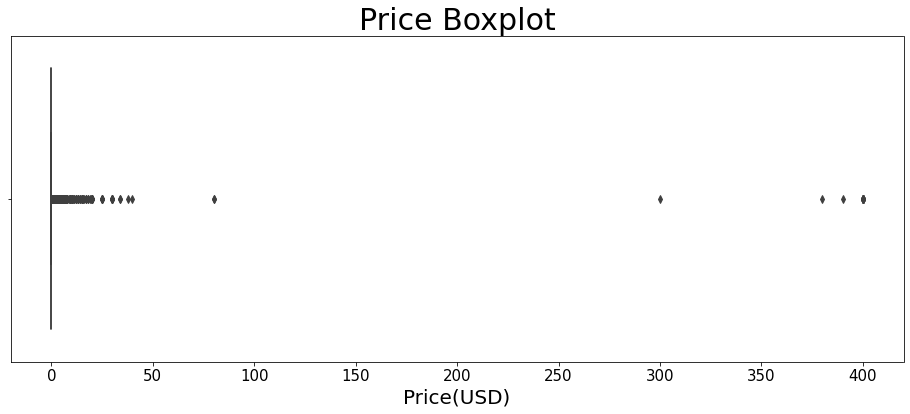

In [25]:
plt.figure(figsize=(16, 6))
b=sns.boxplot(app.Price)
b.axes.set_title("Price Boxplot",fontsize=30)
b.set_xlabel("Price(USD)",fontsize=20)
b.tick_params(labelsize=15)

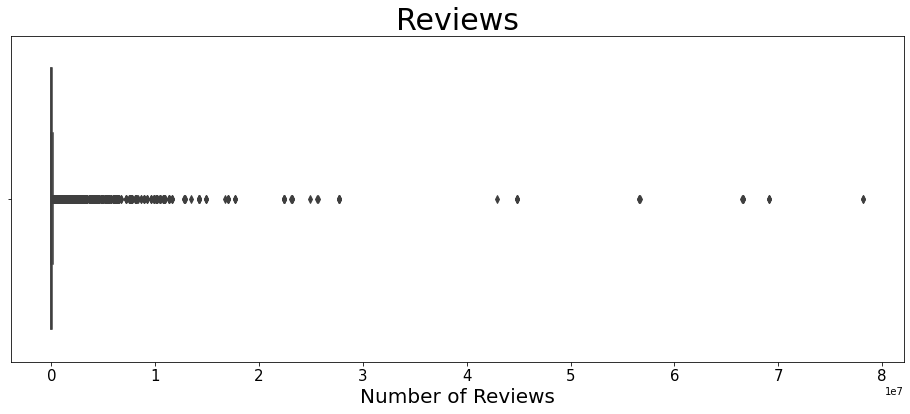

In [26]:
plt.figure(figsize=(16, 6))
b=sns.boxplot(app.Reviews)
b.axes.set_title("Reviews",fontsize=30)
b.set_xlabel("Number of Reviews",fontsize=20)
b.tick_params(labelsize=15)

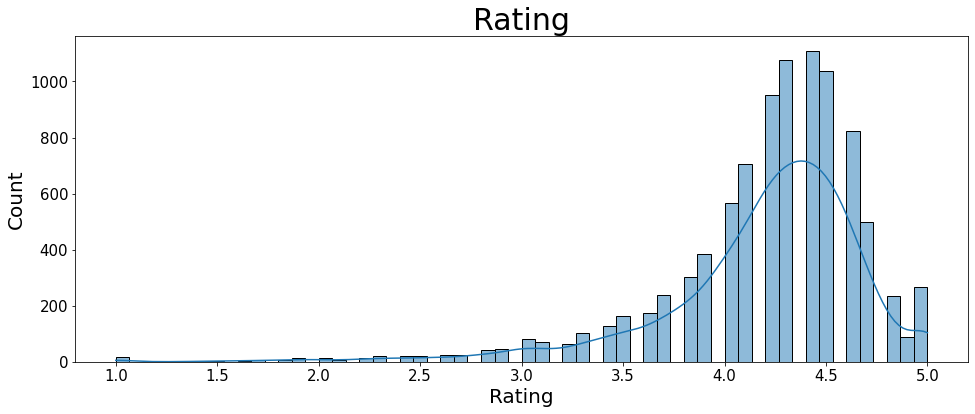

In [27]:
plt.figure(figsize=(16, 6))
h=sns.histplot(app.Rating,bins=60,kde=True)
h.axes.set_title("Rating",fontsize=30)
h.set_xlabel("Rating",fontsize=20)
h.set_ylabel("Count",fontsize=20)
h.tick_params(labelsize=15)

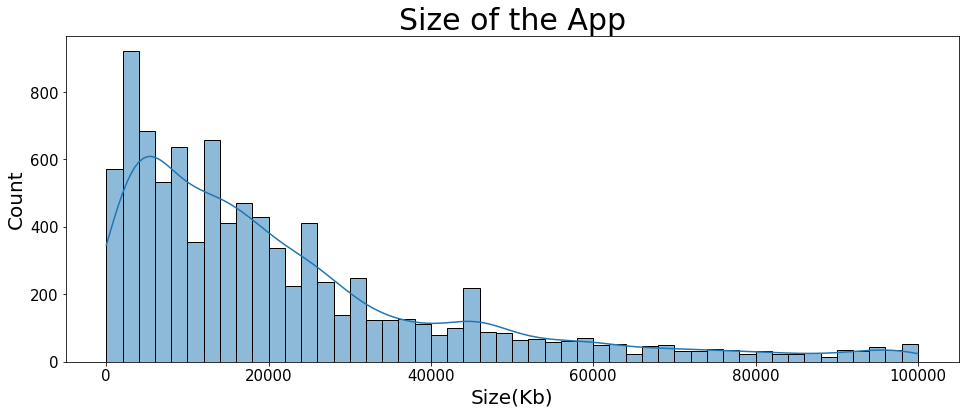

In [28]:
plt.figure(figsize=(16, 6))
h=sns.histplot(app.Size,bins=50,kde=True)
h.axes.set_title("Size of the App",fontsize=30)
h.set_xlabel("Size(Kb)",fontsize=20)
h.set_ylabel("Count",fontsize=20)
h.tick_params(labelsize=15)

In [29]:
app.Price.quantile([0.1,0.25,0.50,0.75,0.90,0.95,0.99])

0.10    0.00
0.25    0.00
0.50    0.00
0.75    0.00
0.90    0.00
0.95    1.99
0.99    8.99
Name: Price, dtype: float64

In [30]:
len(app[app.Price >=200])

15

In [31]:
app.Price.mean()

0.9614669090131416

In [32]:
i7=app[app.Price >=200].Price.index

In [33]:
app.drop(axis=0 ,index=i7, inplace=True)

In [34]:
app.shape

(9338, 13)

In [35]:
len(app[app.Reviews >=2000000])

453

In [36]:
i8=app[app.Reviews >=2000000].Reviews.index

In [37]:
app.drop(axis=0 ,index=i8, inplace=True)

In [38]:
app.shape

(8885, 13)

In [39]:
app.Installs.quantile([0.1,0.25,0.50,0.75,0.90,0.95,0.99])

0.10         1000.0
0.25        10000.0
0.50       500000.0
0.75      5000000.0
0.90     10000000.0
0.95     10000000.0
0.99    100000000.0
Name: Installs, dtype: float64

In [40]:
min_threshold,max_threshold=app.Installs.quantile([0.05,0.95])
inp=app[(app.Installs>min_threshold) & (app.Installs<max_threshold)]

In [41]:
inp.shape

(6618, 13)

Text(40.375, 0.5, 'Rating')

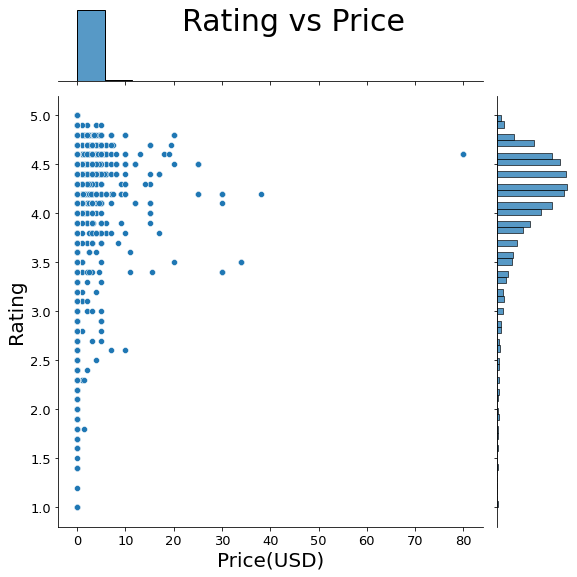

In [42]:
plt.rcParams['xtick.labelsize'] = 13
plt.rcParams['ytick.labelsize'] = 13
j=sns.jointplot(y = "Rating", x = "Price", data = inp,height=8)
j.fig.suptitle("Rating vs Price",fontsize=30)
j.ax_joint.set_xlabel('Price(USD)',fontsize=20)
j.ax_joint.set_ylabel('Rating',fontsize=20)

Text(40.375, 0.5, 'Rating')

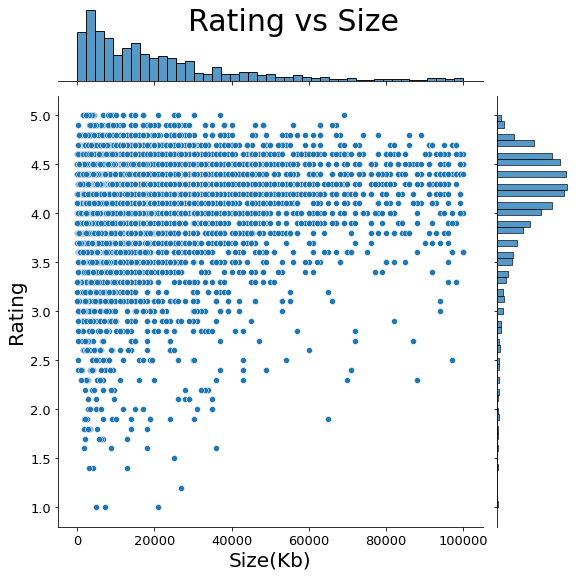

In [43]:
plt.rcParams['xtick.labelsize'] = 13
plt.rcParams['ytick.labelsize'] = 13
j=sns.jointplot(y = "Rating", x = "Size", data = inp,height=8)
j.fig.suptitle("Rating vs Size",fontsize=30)
j.ax_joint.set_xlabel('Size(Kb)',fontsize=20)
j.ax_joint.set_ylabel('Rating',fontsize=20)

Text(40.375, 0.5, 'Rating')

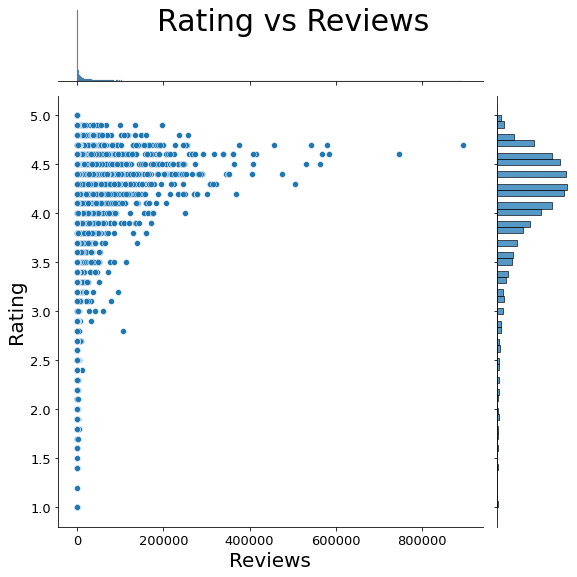

In [44]:
plt.rcParams['xtick.labelsize'] = 13
plt.rcParams['ytick.labelsize'] = 13
j=sns.jointplot(y = "Rating", x = "Reviews", data = inp,height=8)
j.fig.suptitle("Rating vs Reviews",fontsize=30)
j.ax_joint.set_xlabel('Reviews',fontsize=20)
j.ax_joint.set_ylabel('Rating',fontsize=20)

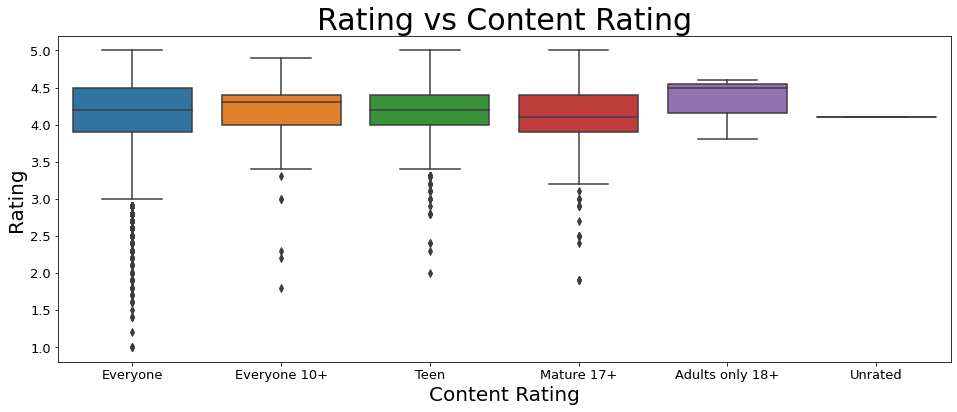

In [45]:
plt.figure(figsize=(16,6))
h=sns.boxplot( x='Content Rating',y='Rating',data=inp)
h.axes.set_title("Rating vs Content Rating",fontsize=30)
h.set_xlabel("Content Rating",fontsize=20)
h.set_ylabel("Rating",fontsize=20)
h.tick_params(labelsize=13)

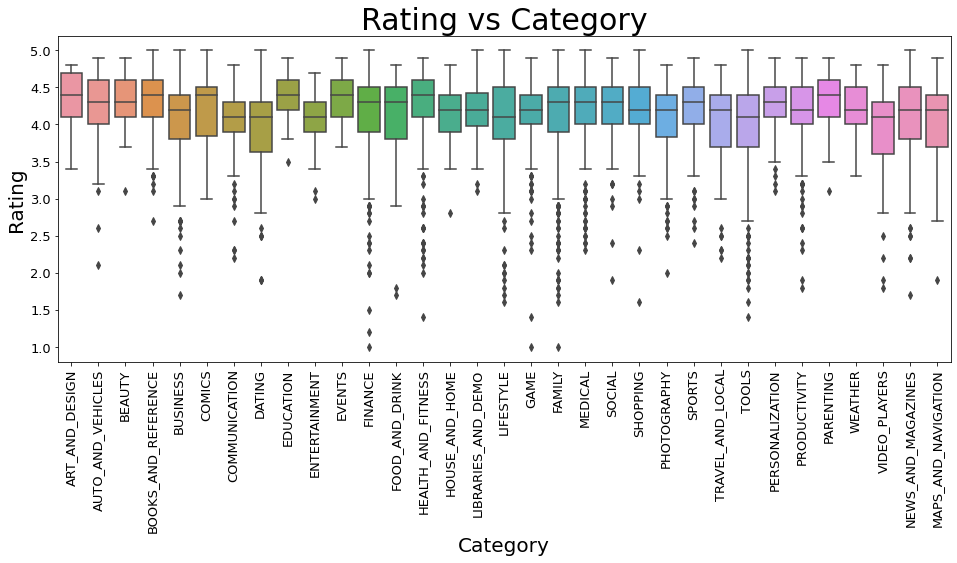

In [46]:
plt.figure(figsize=(16,6))
h=sns.boxplot( x='Category',y='Rating',data=inp)
h.axes.set_title("Rating vs Category",fontsize=30)
h.set_xlabel("Category",fontsize=20)
h.set_ylabel("Rating",fontsize=20)
h.tick_params(labelsize=13)
plt.xticks(rotation=90);

In [47]:
groupCat = inp.groupby('Category')
mean_df=groupCat.mean()
mean_df = mean_df.reset_index()
mean_df.sort_values(by='Rating',ascending=False).head(3)

,Category,Rating,Reviews,Size,Installs,Price
8,EDUCATION,4.363636,38841.975207,20602.355522,1.416132e+06,0.148430
10,EVENTS,4.358824,4720.294118,13704.820433,4.690000e+05,0.000000
0,ART_AND_DESIGN,4.355556,8601.018519,12232.215837,4.486667e+05,0.110556


In [48]:
inp1=inp.copy(deep=True)

In [49]:
inp1['Installs']= np.log1p(inp1['Installs'])
inp1['Reviews']= np.log1p(inp1['Reviews'])

Text(0.5, 1.0, 'Reviews')

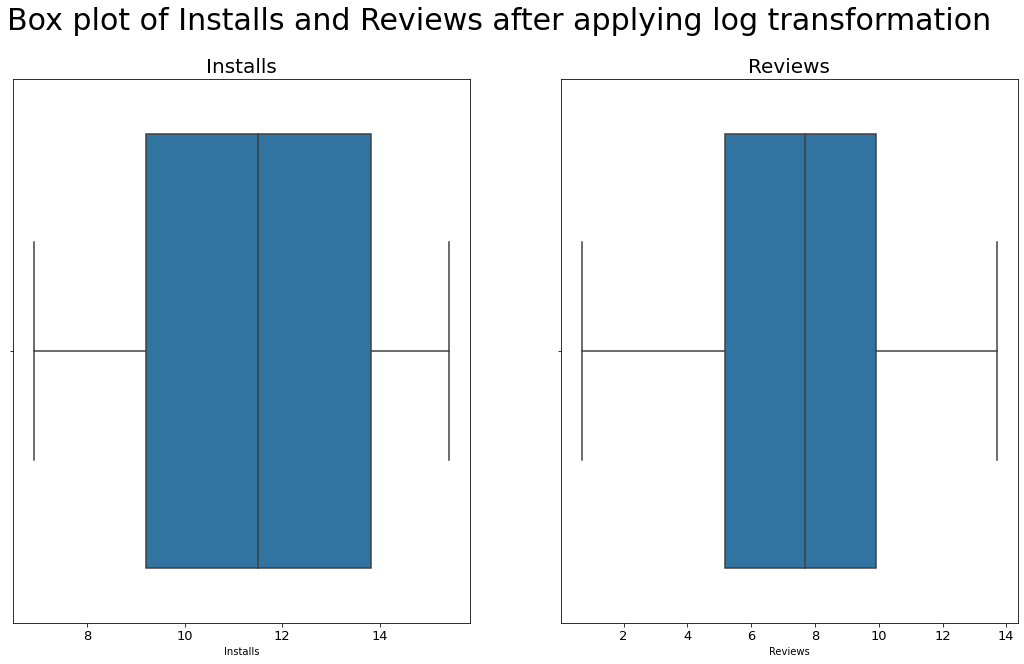

In [50]:
fig, axes = plt.subplots(1,2, figsize=(18, 10))
fig.suptitle('Box plot of Installs and Reviews after applying log transformation',fontsize=30)
sns.boxplot( inp1.Installs,ax=axes[0])
sns.boxplot( inp1.Reviews,ax=axes[1],)
axes[0].set_title("Installs",fontsize=20)
axes[1].set_title("Reviews",fontsize=20)

In [51]:
inp1.drop(['App','Last Updated','Current Ver','Android Ver','Type'],axis=1,inplace=True)

In [52]:
inp1.shape

(6618, 8)

In [53]:
inp1.head()

,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,5.075174,19000.0,9.210440,0.0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,6.875232,14000.0,13.122365,0.0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,11.379520,8700.0,15.424949,0.0,Everyone,Art & Design
4,ART_AND_DESIGN,4.3,6.875232,2800.0,11.512935,0.0,Everyone,Art & Design;Creativity
5,ART_AND_DESIGN,4.4,5.123964,5600.0,10.819798,0.0,Everyone,Art & Design


In [54]:
cat_cols = ['Category', 'Content Rating','Genres']
inp2 = pd.get_dummies(inp1, columns=cat_cols, drop_first=True)
inp2.head()

,Rating,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Genres_Strategy;Education,Genres_Tools,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
0,4.1,5.075174,19000.0,9.210440,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,6.875232,14000.0,13.122365,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,11.379520,8700.0,15.424949,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,6.875232,2800.0,11.512935,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4.4,5.123964,5600.0,10.819798,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
df_train, df_test = train_test_split(inp2, train_size=0.70, random_state=0)
df_train.shape,df_test.shape

((4632, 150), (1986, 150))

In [56]:
y_train=df_train.Rating
X_train=df_train.drop(['Rating'],axis=1)

In [57]:
y_test=df_test.Rating
X_test=df_test.drop(['Rating'],axis=1)

In [58]:
X_train.shape,X_test.shape

((4632, 149), (1986, 149))

In [59]:
reg =LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [60]:
y_pred= reg.predict(X_train)
print('\nR2 on train set: %.2f' % r2_score(y_train, y_pred).round(decimals=2))


R2 on train set: 0.17


In [61]:
y_pred2=reg.predict(X_test)
r2=r2_score(y_test,y_pred2).round(decimals=2)

In [62]:
print('\nR2: %.2f' % r2)

print('\nMean Squared Error: %.2f'
      % mean_squared_error(y_test, y_pred2))

print("\nRoot Mean Squared Error",np.sqrt(mean_squared_error(y_test,y_pred2)).round(decimals=2))


R2: 0.15

Mean Squared Error: 0.23

Root Mean Squared Error 0.47


In [63]:
dfReg = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred2,'Difference':y_test-y_pred2})
dfReg

,Actual,Predicted,Difference
7200,3.4,3.890554,-0.490554
9236,3.0,3.934422,-0.934422
2983,4.3,4.263932,0.036068
7146,4.2,3.917974,0.282026
5962,4.4,4.164622,0.235378
...,...,...,...
271,3.8,4.099635,-0.299635
2183,4.4,4.399944,0.000056
5726,3.5,4.106412,-0.606412
4298,4.5,4.077367,0.422633


In [89]:
from mlxtend.evaluate import bias_variance_decomp

In [90]:
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(reg, X_train.values,
                                                            y_train.values, X_test.values,
                                                            y_test.values,
                                                            loss='mse',
                                                            num_rounds=50,
                                                            random_seed=20)

In [91]:
print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

Average expected loss: 0.229
Average bias: 0.226
Average variance: 0.004


In [92]:
#done